# Taller 3 -Manejo de Archivos y BioPython
## Fundamentos en Biología Computacional
## 2019-1, Prof. Javier Correa

Nota: Se calificará que el código sea lo más simple, claro, original y eficiente. No usar funciones no realizadas por ustedes mismos.

Competencias: 1. Resuelve problemas de ciencias de los datos utilizando razonamiento lógico y programación en python. 2. Manipula archivos con formatos utilizados en bioinformática para extaeer información relevante. 3. Utiliza efectivamente módulos y paquetes de python especializados para biología.

Tener en cuenta: a. desarrollar y aplicar funciones en python, b. manipular archivos (entrada y salida), c. utilizar librerias especializadas (Biopython).<br>
Ejercicio:<br>

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

Especie	id
Quinua	63459
Tomate	4081
Oliva	4146
Yuca	3983
Papa	4113
Repollo	3712
Lechuga	4236
Durazno	3760
Piña	4615
Coco	13894
Lenteja	3864
Arveja	3888
Berenjena	4111
Garbanzo	3827


LOCUS       MG859922              122198 bp    DNA     circular PLN 30-APR-2018
DEFINITION  Pisum sativum subsp. elatius isolate CE1 chloroplast, complete
            genome.
ACCESSION   MG859922
VERSION     MG859922.1
KEYWORDS    .
SOURCE      chloroplast Pisum sativum subsp. elatius
  ORGANISM  Pisum sativum subsp. elatius
            Eukaryota; Viridiplantae; Streptophyta; Embryophyta; Tracheophyta;
            Spermatophyta; Magnoliophyta; eudicotyledons; Gunneridae;
            Pentapetalae; rosids; fabids; Fabales; Fabaceae; Papilionoideae;
            Fabeae; Pisum.
REFERENCE   1  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and
            Vasiliev,G.V.
  TITLE     Cryptic divergences in the genus Pisum L., as revealed by
            comparative analysis of complete plastid genomes
  JOURNAL   Unpublished
REFERENCE   2  (bases 1 to 122198)
  AUTHORS   Bogdanova,V.S., Mglinets,A.V., Shatskaya,N.V., Kosterin,O.E. and


#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

In [1]:
#A
import Bio
from Bio import SeqIO
tax=SeqIO.parse("Mercado.gb","gb")
datos=[]

for read in tax:
    datos.append(read)
for i in range(0,len(datos)):
    print(datos[i].annotations["taxonomy"])
    

['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Fabales', 'Fabaceae', 'Papilionoideae', 'Fabeae', 'Pisum']
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'asterids', 'lamiids', 'Solanales', 'Solanaceae', 'Solanoideae', 'Solaneae', 'Solanum']
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Arecaceae', 'Arecoideae', 'Cocoseae', 'Attaleinae', 'Cocos']
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Rosales', 'Rosaceae', 'Maloideae', 'Amygdaleae', 'Prunus']
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Sperm

In [2]:
#B
taxonomia=[]
for i in range(0,len(datos)):
    d=datos[i].annotations["taxonomy"]
    taxonomia.append(d)
print(taxonomia[0])

['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Fabales', 'Fabaceae', 'Papilionoideae', 'Fabeae', 'Pisum']


In [3]:
#C
for i in range(0,len(datos)):
    taxonomia=datos[i].annotations["taxonomy"]
ancestro=0
x=len(taxonomia)
for i in range (0,x):
    y=len(taxonomia[i])
    for j in range (0,y):
        try:
            if taxonomia[i][j]==taxonomia[i+1][j]:
                ancestro=j
        except: 
            continue
print(taxonomia[ancestro])
            
                
       

Magnoliophyta


2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



In [4]:
#2.A
# print (datos[0].seq)

from Bio import SeqIO
from Bio.SeqUtils import GC

diccionario={}

gc_values=[GC(rec.seq) for rec in SeqIO.parse("mercado.gb","genbank")] 
especies=[]

for i in range(0,len(datos)):
    a=datos[i].annotations["organism"]
    especies.append(a)
    
gc_values[0] 

for i in range(0,len(gc_values)): 
    diccionario[especies[i]]=gc_values[i]
diccionario     
    
# la especie con menor % cg es Cicer arietinum con 33.90627119590804% y la especie con el mayor porcentaje es Solanum tuberosum' con 37.87344184609045%


{'Pisum sativum subsp. elatius': 34.83117563298908,
 'Solanum melongena var. insanum': 37.710355466992354,
 'Cocos nucifera': 37.4382835724441,
 'Prunus persica': 36.759617212751124,
 'Cicer arietinum': 33.90627119590804,
 'Lactuca sativa': 37.54942005079465,
 'Lens culinaris': 34.42549627135735,
 'Olea europaea subsp. laperrinei': 37.81224741156999,
 'Solanum tuberosum': 37.87344184609045,
 'Ananas comosus': 37.37314891377885,
 'Chenopodium quinoa': 37.243747064543655,
 'Brassica oleracea var. capitata': 36.36138387908663,
 'Solanum lycopersicum': 37.86184803026014,
 'Manihot esculenta': 35.87297851387091}

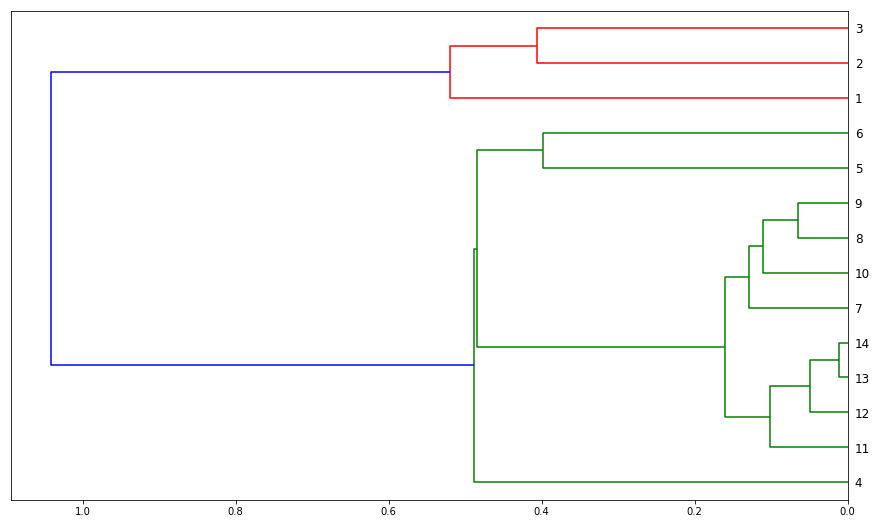

In [10]:
# cluster-dendograma 

from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
PorcentajeGC=([[33.90627119590804],  
    [34.42549627135735],
    [34.8311756329890],
    [35.87297851387091],
    [36.36138387908663],
    [36.759617212751124],
    [37.243747064543655],
    [37.37314891377885],
    [37.4382835724441],
    [37.54942005079465],
    [37.71035546699235],
    [37.81224741156999],
    [37.86184803026014],
    [37.87344184609045],])

dendrograma = linkage(PorcentajeGC, 'single')

lista = range(0, 15)

plt.figure(figsize=(15, 9))  
dendrogram(dendrograma, orientation='left', labels=lista, distance_sort='descending', show_leaf_counts=True)

plt.show()